C = 0.5
R = 40


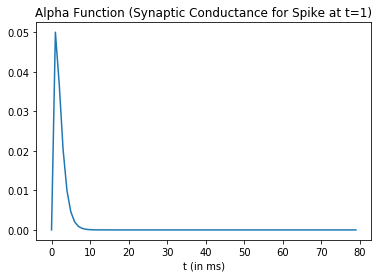

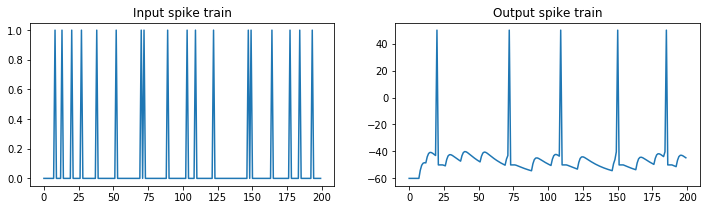

C = 0.5
R = 40


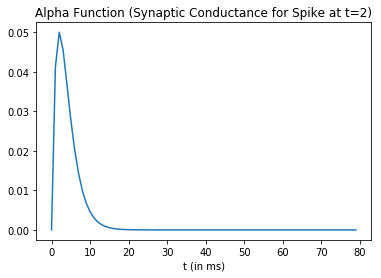

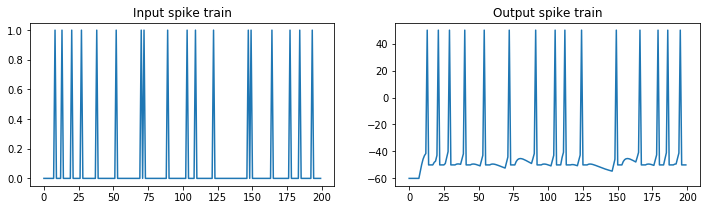

C = 0.5
R = 40


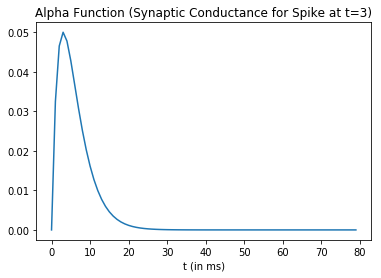

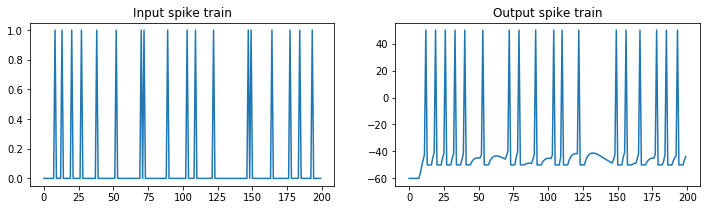

C = 0.5
R = 40


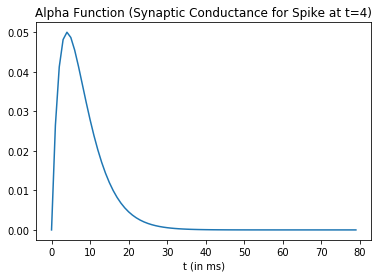

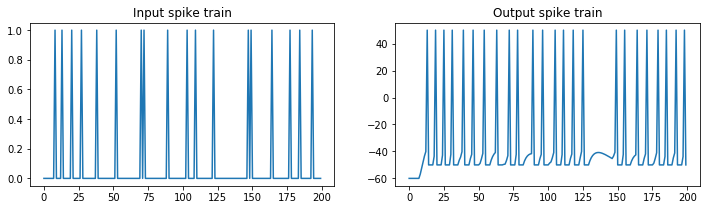

C = 0.5
R = 40


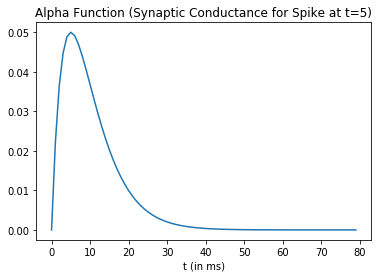

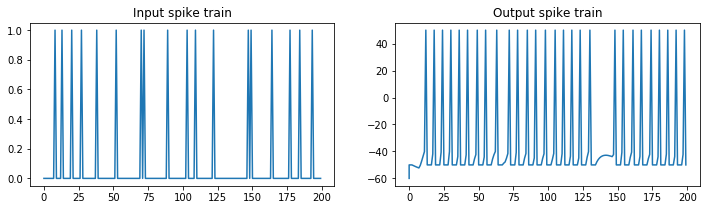

C = 0.5
R = 40


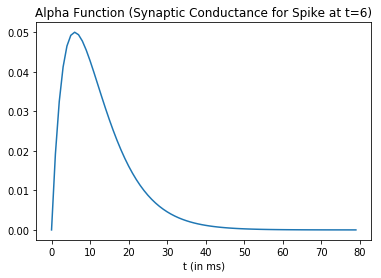

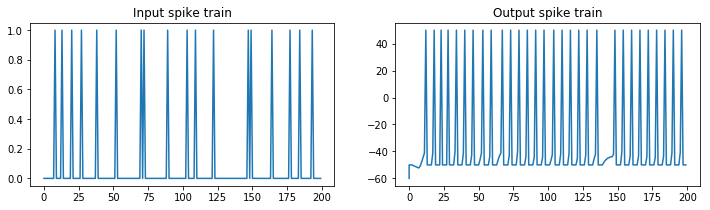

C = 0.5
R = 40


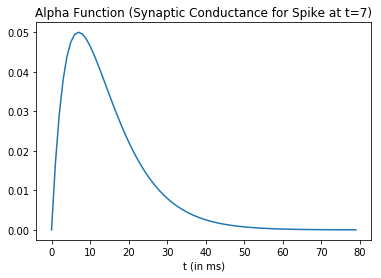

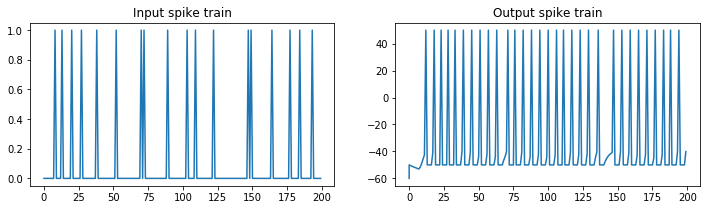

C = 0.5
R = 40


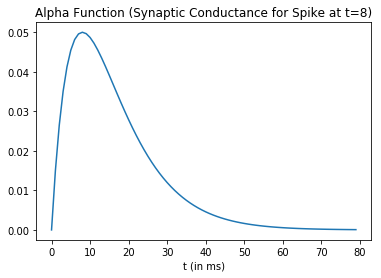

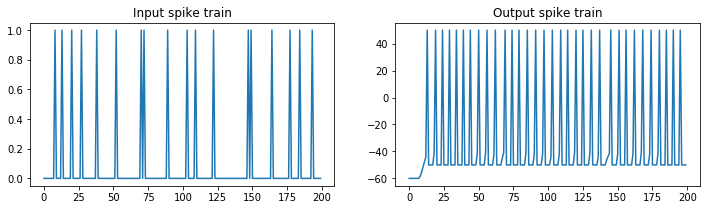

C = 0.5
R = 40


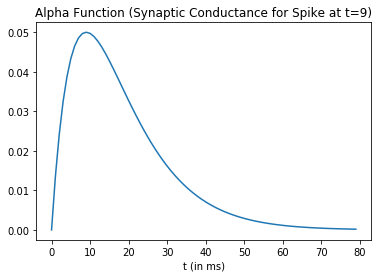

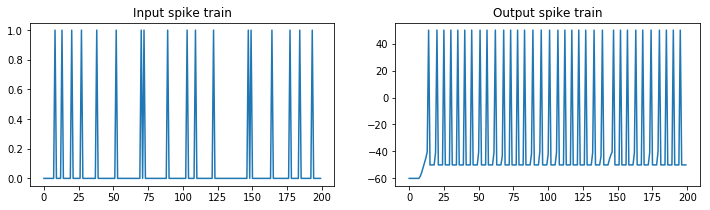

C = 0.5
R = 40


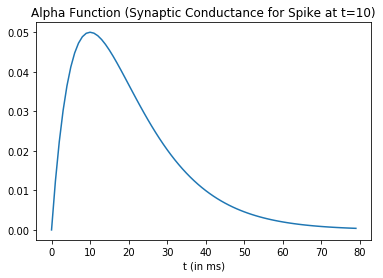

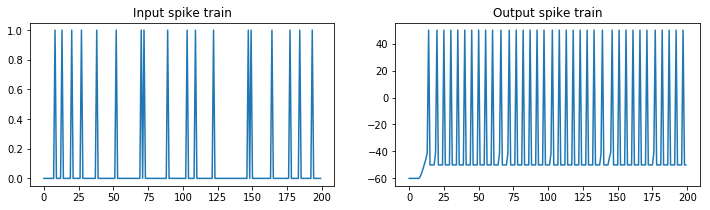

In [27]:
"""
Created on Wed Apr 22 16:13:18 2015

Fire a neuron via alpha function synapse and random input spike train
R Rao 2007

translated to python by rkp 2015
"""
from __future__ import print_function, division

import time
import numpy as np
from numpy import concatenate as cc
import matplotlib.pyplot as plt

np.random.seed(0)
# I & F implementation dV/dt = - V/RC + I/C
h = 1. # step size, Euler method, = dt ms
t_max= 200 # ms, simulation time period
tstop = int(t_max/h) # number of time steps
ref = 0 # refractory period counter

# Generate random input spikes
# Note: This is not entirely realistic - no refractory period
# Also: if you change step size h, input spike train changes too...
thr = 0.9 # threshold for random spikes
spike_train = np.random.rand(tstop) > thr

for tp in range(1, 11, 1):
    # alpha func synaptic conductance
    t_a = 100 # Max duration of syn conductance
    t_peak = tp # ms
    g_peak = 0.05 # nS (peak synaptic conductance)
    const = g_peak / (t_peak*np.exp(-1));
    t_vec = np.arange(0, t_a + h, h)
    alpha_func = const * t_vec * (np.exp(-t_vec/t_peak))

    plt.plot(t_vec[:80], alpha_func[:80])
    plt.xlabel('t (in ms)')
    plt.title('Alpha Function (Synaptic Conductance for Spike at t=' + str(tp) +')')
    plt.draw()
    time.sleep(2) 

    # capacitance and leak resistance
    C = 0.5 # nF
    R = 40 # M ohms
    print('C = {}'.format(C))
    print('R = {}'.format(R))

    # conductance and associated parameters to simulate spike rate adaptation
    g_ad = 0
    G_inc = 1/h
    tau_ad = 2

    # Initialize basic parameters
    E_leak = -60 # mV, equilibrium potential
    E_syn = 0 # Excitatory synapse (why is this excitatory?)
    g_syn = 0 # Current syn conductance
    V_th = -40 # spike threshold mV
    V_spike = 50 # spike value mV
    ref_max = 4/h # Starting value of ref period counter
    t_list = np.array([], dtype=int)
    V = E_leak
    V_trace = [V]
    t_trace = [0]

    fig, axs = plt.subplots(1, 2, figsize=(12,3))
    axs[0].plot(np.arange(0,t_max,h), spike_train)
    axs[0].set_title('Input spike train')

    for t in range(tstop):

        # Compute input
        if spike_train[t]: # check for input spike
            t_list = cc([t_list, [1]])

        # Calculate synaptic current due to current and past input spikes
        g_syn = np.sum(alpha_func[t_list])
        I_syn = g_syn*(E_syn - V) 

        # Update spike times
        if np.any(t_list):
            t_list = t_list + 1
            if t_list[0] == t_a: # Reached max duration of syn conductance
                t_list = t_list[1:]

        # Compute membrane voltage
        # Euler method: V(t+h) = V(t) + h*dV/dt
        if not ref:
            V = V + h*(-((V-E_leak)*(1+R*g_ad)/(R*C)) + (I_syn/C))
            g_ad = g_ad + h*(-g_ad/tau_ad) # spike rate adaptation
        else:
            ref -= 1
            V = V_th - 10 # reset voltage after spike
            g_ad = 0

        # Generate spike
        if (V > V_th) and not ref:
            V = V_spike
            ref = ref_max
            g_ad = g_ad + G_inc

        V_trace += [V]
        t_trace += [t*h]


    axs[1].plot(t_trace,V_trace,)
    axs[1].set_title('Output spike train')
    plt.draw()
    plt.show()